<div style="padding:20px;color:black;font-size:250%;text-align:center;border-radius:25px;background-color:orange;font-weight:700;border: 5px solid red;">❤️ Cardiovascular Diseaset Statistic</div>

<img src = "https://www.apple.com/newsroom/tr/images/product/watch/standard/Apple-Watch-ECG-app-12062018_big.gif.large.gif">

<div style="padding:20px;color:#D51CE8;font-size:250%;text-align:center;background-color:#F7FF00;font-weight:700;border: 5px solid #23C443;">📑 Giriş</div>

<h3 style= "color: blue">Amaç</h3>
<b style = "color : red">Confidence İnterval</b>, <b style = "color : red">One Sample t Test</b>, <b style = "color : red">Independent Samples T Test</b>, <b style = "color : red">Levene Test</b>, <b style = "color : red">One-way ANOVA</b> ve <b style = "color : red" >Chi-Square Test</b> kullanarak verimizi incelemek

<h3 style= "color: blue">Aşama 1</h3>
<ol>
    <li><b>Verinin özelliklerinin gözden geçirilmesi</b></li>
    <li><b>Column'ların tanıtımları</b></li>
    <li><b>DataFrame'in Düzenlenmesi ve Sample Oluşturma</b></li>
</ol>

<h3 style= "color: blue">Aşama 2</h3>
<ol>
    <li><b>Verilerin İstatiksel Araştırılması</b></li>
</ol>

<div style="padding:15px;color:black;font-size:200%;text-align:center;border-radius:5px;background-color:#E040FB;font-weight:700;border: 2px solid red;">🔖 Aşama 1</div>

# 👁️ Verinin özelliklerinin gözden geçirilmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['figure.dpi'] = 70

In [2]:
df0 = pd.read_csv("cardio.csv", sep=";")
df = df0.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# 🧮 Column Tanımları
<ul>
        <li><b style = "color : red">age </b>:Yaş(gün)</li>
        <li><b style = "color : red">gender </b>: Cinsiyet | 1:Female, 2:Male</li>
        <li><b style = "color : red">height </b>: Uzunluk(cm)</li>
        <li><b style = "color : red">weight </b>: Ağırlık(kg)</li>
        <li><b style = "color : red">ap_hi </b>: Sistolik Kan Basıncı(Büyük Tansiyon)(int)</li>
        <li><b style = "color : red">ap_lo </b>: Diyastolik Kan Basıncı(Küçük Tansiyon)(int)</li>
        <li><b style = "color : red">cholesterol </b>: Kolestrol | 1: normal, 2: normalin üzerinde, 3: normalin çok üzerinde</li>
        <li><b style = "color : red">gluc </b>: Glukoz | 1: normal, 2: normalin üzerinde, 3: normalin çok üzerinde</li>
        <li><b style = "color : red">smoke </b>: 0: İçmiyor, 1: İçiyor</li>
        <li><b style = "color : red">alco </b>: Alkol | 0: İçmiyor, 1: İçiyor</li>
        <li><b style = "color : red">active </b>: Aktiflik | 0: Aktif Değil, 1: Aktif</li>
        <li><b style = "color : red">cardio </b>: 0: Cardiovasküler Hastası Değil, 1: Cardiovasküler Hastası</li>
    </ul>

# 🧼 DataFrame'in Düzenlenmesi

**Age sütünü gün bazlı verildiği için onu ortalama olarak yıl'a çevirelim**

In [4]:
df.age = round(df.age / 365).astype(int)

In [5]:
df.ap_hi.sort_values()

35040     -150
23988     -140
46627     -120
25240     -120
16021     -115
         ...  
47253    14020
25464    14020
25519    14020
46912    14020
40852    16020
Name: ap_hi, Length: 70000, dtype: int64

**Sistolik kan basıncı negtif ve cok yüksek değerler olamayacağı için aralığını araştırmalar neticesinde 70 ile 170 arasında alalım**

In [6]:
df = df[(df.ap_hi < 170) & (df.ap_hi > 70)]

**Diolastik kan basıncı 0 ve cok yüksek değerler olamayacağı için aralığını araştırmalar neticesinde 40 ile 120 arasında alalım**

In [7]:
df = df[(df.ap_lo < 120) & (df.ap_lo > 40)]

**Sample'i 10000 alalım**

In [8]:
df = df.sample(10000)

<div style="padding:15px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:orange;overflow:hidden;font-weight:700;border: 2px solid red;">🔖 Aşama 2</div>

In [9]:
df.describe()[["age","height","weight", "ap_hi", "ap_lo"]]

,age,height,weight,ap_hi,ap_lo
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,53.399400,164.305900,73.869385,125.535500,80.94610
std,6.767101,8.243781,14.034757,14.636405,8.79057
min,39.000000,60.000000,21.000000,80.000000,45.00000
25%,49.000000,159.000000,65.000000,120.000000,80.00000
50%,54.000000,165.000000,72.000000,120.000000,80.00000
75%,58.000000,170.000000,82.000000,140.000000,90.00000
max,65.000000,207.000000,180.000000,168.000000,110.00000


# 🩸 ap_hi

In [10]:
df.describe().ap_hi

count    10000.000000
mean       125.535500
std         14.636405
min         80.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        168.000000
Name: ap_hi, dtype: float64

In [11]:
Q1 = np.percentile(df.ap_hi, 25)
Q3 = np.percentile(df.ap_hi, 75)
IQR = stats.iqr(df.ap_hi)

In [12]:
lower_limit = Q1 - 1.5 * IQR
lower_limit

90.0

**Alt limit**

In [13]:
upper_limit = Q3 + 1.5 * IQR
upper_limit

170.0

**Üst limit**

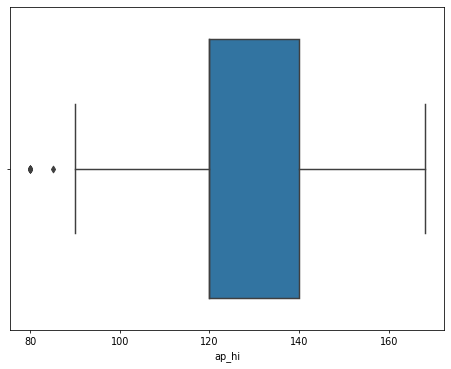

In [14]:
sns.boxplot(df.ap_hi);

**Ortalama 125 olabilir mi onu inceleyelim**

In [15]:
# 1.Yol
x_bar = df.ap_hi.mean()
n = len(df.ap_hi)
s = df.ap_hi.std()
mü = 125
alpha = 0.05

In [16]:
t = (x_bar - mü) / (s / np.sqrt(n))

In [17]:
1 - stats.t.cdf(t, n-1)

0.00012740812579647987

In [18]:
# 2.Yol
stats.ttest_1samp(df.ap_hi, 125, alternative="greater")

Ttest_1sampResult(statistic=3.6586852196546955, pvalue=0.00012740812579642427)

**%95 güvenirlikte incelediğimizde pvalue < alpha oldugundan H0 hipotezi reddedilir. Yani ortalama 125'ten büyüktür**

In [19]:
sem = df.ap_hi.sem()
stats.t.interval(0.95, len(df.ap_hi) - 1, df.ap_hi.mean(), sem)

(125.24859699696759, 125.8224030030324)

**Ortalama uzunluk %95 güvenirlikte 125.2 ile 125.8 arasındadır**

# 🩸 ap_hi ❌ Gender👩👨

**Erkek ve kadın sistolik kan basıncına bakalım**

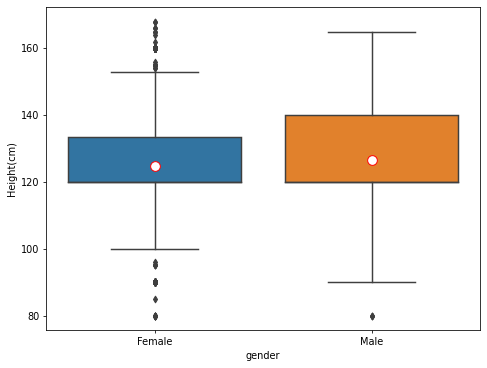

In [20]:
ax = sns.boxplot(y = df.ap_hi,x =  df.gender, showmeans = True, meanprops = {"marker" : "o",
                                                      "markerfacecolor" : "white",
                                                      "markeredgecolor" : "red",
                                                      "markersize" : 10})
ax.set_xticklabels(["Female", "Male"])
ax.set_ylabel("Height(cm)");

In [21]:
df.groupby("gender").ap_hi.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,6507.0,124.913785,14.891526,80.0,120.0,120.0,133.5,168.0
2,3493.0,126.693673,14.077944,80.0,120.0,120.0,140.0,165.0


**Kadınların büyük tansiyonu 124.9 iken erkeklerinki 126.7'dir. İstatiksel anlamda farklı mıdır dıye inceleyelim**

In [22]:
stats.levene(df[df.gender == 1].ap_hi, df[df.gender == 2].ap_hi)

LeveneResult(statistic=1.4555558509549695, pvalue=0.2276671034543365)

**pvalue > 0.05 oldugu için varyanslar aynıdır diyebiliriz**

In [138]:
stats.ttest_ind(df[df.gender == 1].ap_hi, df[df.gender == 2].ap_hi, equal_var=True)

Ttest_indResult(statistic=-5.807074283356783, pvalue=6.551233420774094e-09)

**pvalue < 0.05 oldugu için H0 reddedilir ve istatiksel olarak kadın ve erkeklerin büyük tansiyon ortalamarı farklıdır**

# 🩸 ap_hi ❌ cholesterol😷

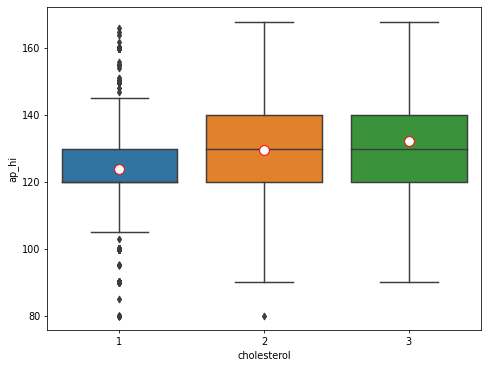

In [24]:
ax = sns.boxplot(y = df.ap_hi,x =  df.cholesterol, showmeans = True, meanprops = {"marker" : "o",
                                                      "markerfacecolor" : "white",
                                                      "markeredgecolor" : "red",
                                                      "markersize" : 10})

In [25]:
df.groupby("cholesterol").ap_hi.describe()

,count,mean,std,min,25%,50%,75%,max
cholesterol,,,,,,,,
1,7506.0,123.778044,13.910316,80.0,120.0,120.0,130.0,166.0
2,1329.0,129.616253,16.602917,80.0,120.0,130.0,140.0,168.0
3,1165.0,132.203433,13.954109,90.0,120.0,130.0,140.0,168.0


**Kolestrol seviyelerine göre yüksek tansiyon ortalamarında anlamlı bir fark var mı inceleyelim**

In [26]:
stats.f_oneway(df[df["cholesterol"]==1]["ap_hi"],
               df[df["cholesterol"]==2]["ap_hi"],
               df[df["cholesterol"]==3]["ap_hi"])

F_onewayResult(statistic=237.376267301355, pvalue=1.9135170703924852e-101)

**pvalue < 0.05 oldugu  için H0 hipotezini reddediriz. En az biri farklıdır. Peki hangisi ?**

In [27]:
multicomp = MultiComparison(df.ap_hi, df.cholesterol)

In [28]:
tukey = multicomp.tukeyhsd(alpha = 0.05)

In [29]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   5.8382   0.0 4.8405 6.8359   True
     1      3   8.4254   0.0 7.3697 9.4811   True
     2      3   2.5872   0.0 1.2417 3.9327   True
-------------------------------------------------


**Tüm colestrol seviyelerinin yüksek tansiyon ortalamarı birbirinden farklıdır**

# 🩸 ap_hi ❌ gluc🍨

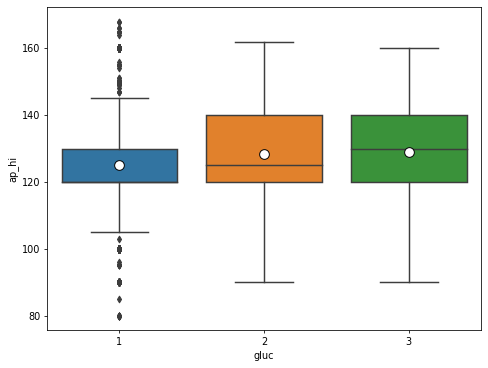

In [30]:
sns.boxplot(x = df.gluc, y = df.ap_hi, showmeans = True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"});

In [31]:
df.groupby("gluc").ap_hi.describe()

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,8474.0,124.956927,14.466814,80.0,120.0,120.0,130.0,168.0
2,741.0,128.450742,16.507224,90.0,120.0,125.0,140.0,162.0
3,785.0,129.029299,13.756646,90.0,120.0,130.0,140.0,160.0


**Ortalamalar arasında istatiksel olarak bir fark var mı ınceleyelım**

In [32]:
stats.f_oneway(df[df["gluc"]==1]["ap_hi"],
               df[df["gluc"]==2]["ap_hi"],
               df[df["gluc"]==3]["ap_hi"])

F_onewayResult(statistic=44.0602151254398, pvalue=8.886573989793138e-20)

**pvalue < 0.05 oldugu için için H0 hipotezini reddediriz. En az biri farklıdır. Peki hangisi ?**

In [33]:
multicomp = MultiComparison(df.ap_hi, df.gluc)

In [34]:
tukey = multicomp.tukeyhsd(alpha = 0.05)

In [35]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   3.4938    0.0  2.1851 4.8025   True
     1      3   4.0724    0.0  2.7979 5.3469   True
     2      3   0.5786 0.7184 -1.1712 2.3283  False
---------------------------------------------------


**1 ve 3.seviyedeki şeker hastalarının yüksek tansiyonlar ile ortalamalarının aynıdır**

# 🩸 ap_hi ❌ smoke🚬

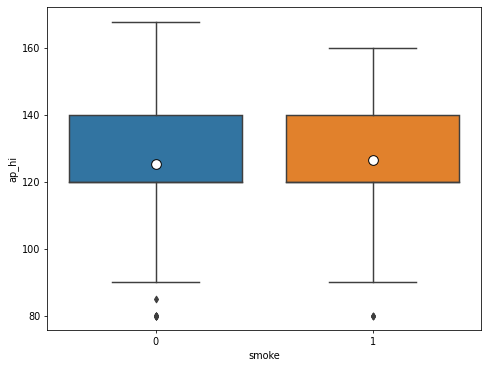

In [36]:
sns.boxplot(x = df.smoke, y = df.ap_hi, showmeans = True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"});

In [37]:
df.groupby("smoke").ap_hi.describe()

,count,mean,std,min,25%,50%,75%,max
smoke,,,,,,,,
0,9110.0,125.444018,14.598889,80.0,120.0,120.0,140.0,168.0
1,890.0,126.471910,14.991328,80.0,120.0,120.0,140.0,160.0


**Sigara içen ve içmeyenler'in büyük tansiyonların ortalamaları arasında anlamı bir fark var mı yok mu ınceleyelım**

In [38]:
stats.levene(df[df.smoke == 0].ap_hi, df[df.smoke == 1].ap_hi)

LeveneResult(statistic=3.9822695056954673, pvalue=0.04600865557733768)

**pvalue < 0.05 oldugu için varyanslar farklıdır diyebiliriz**

In [139]:
stats.ttest_ind(df[df["smoke"]==0]["ap_hi"],df[df["smoke"]==1]["ap_hi"], equal_var=False)

Ttest_indResult(statistic=-1.9568731623627307, pvalue=0.050624474853299795)

**pvalue > 0.05 cıktıgı için sigara ve kullanmayan kişilerin yüksek tansiyon ortalamaları istatiksel olarak birbiri ile aynıdır**

# 🩸 ap_hi ❌ alco🍾

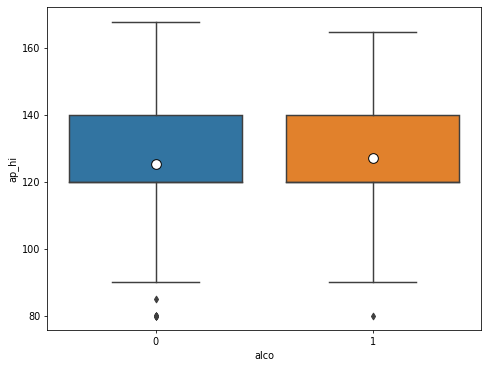

In [40]:
sns.boxplot(x = df.alco, y = df.ap_hi, showmeans = True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"});

In [41]:
df.groupby("alco").ap_hi.describe()

,count,mean,std,min,25%,50%,75%,max
alco,,,,,,,,
0,9454.0,125.440131,14.613290,80.0,120.0,120.0,140.0,168.0
1,546.0,127.186813,14.948409,80.0,120.0,120.0,140.0,165.0


**Alkol içen ve içmeyenler'in büyük tansiyonların ortalamaları arasında anlamı bir fark var mı yok mu ınceleyelım**

In [42]:
stats.levene(df[df.alco == 0].ap_hi, df[df.alco == 1].ap_hi)

LeveneResult(statistic=5.868366928189718, pvalue=0.015433000719866183)

**pvalue > 0.05 oldugu için varyanslar aynıdır diyebiliriz**

In [140]:
stats.ttest_ind(df[df["alco"]==0]["ap_hi"],df[df["alco"]==1]["ap_hi"], equal_var=True)

Ttest_indResult(statistic=-2.712198874456187, pvalue=0.006695279716497735)

**pvalue < 0.05 oldugu için H0 hipotezini reddederiz. Yani istatiksel olarak alcol kullanma durumuna göre yüksek tansiyonun ortalamaları arasında herhangi bir bağ yoktur**

# 🩸 ap_hi ❌ active🚴

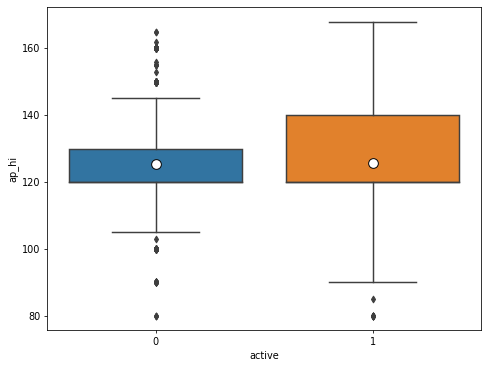

In [44]:
sns.boxplot(x = df.active, y = df.ap_hi, showmeans = True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"});

In [45]:
df.groupby("active").ap_hi.describe()

,count,mean,std,min,25%,50%,75%,max
active,,,,,,,,
0,1900.0,125.328947,14.517470,80.0,120.0,120.0,130.0,165.0
1,8100.0,125.583951,14.664634,80.0,120.0,120.0,140.0,168.0


**Aktif olanların ve olmayanların büyük tansiyonların ortalamaları arasında anlamı bir fark var mı yok mu ınceleyelım**

In [46]:
stats.levene(df[df.active == 0].ap_hi, df[df.active == 1].ap_hi)

LeveneResult(statistic=1.420052391360639, pvalue=0.23342306592128992)

**pvalue > 0.05 oldugu için varyanslar aynıdır diyebiliriz**

In [47]:
stats.ttest_ind(df[df["active"]==0]["ap_hi"],df[df["active"]==1]["ap_hi"], equal_var=True)

Ttest_indResult(statistic=-0.6834693156334005, pvalue=0.49432617137269974)

**pvalue > 0.05 oldugu için H0 hipotezini kabul ederiz. Yani Aktif olanlar ile olmayanlar arasındaki yüksek tansiyon ortalamarı arasında anlamlı bir fark yoktur**

# 🩸 ap_hi ❌ cardio❤️

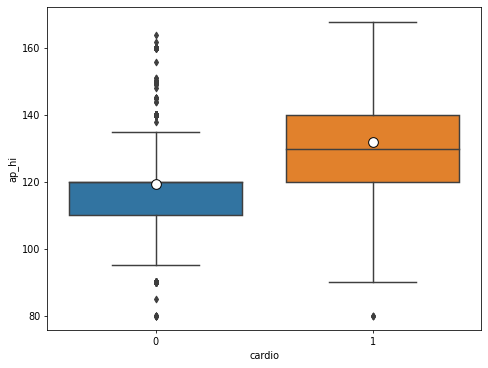

In [48]:
sns.boxplot(x = df.cardio, y = df.ap_hi, showmeans = True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"});

In [49]:
df.groupby("cardio").ap_hi.describe()

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,5124.0,119.346799,11.663333,80.0,110.0,120.0,120.0,164.0
1,4876.0,132.038966,14.624536,80.0,120.0,130.0,140.0,168.0


**Cardiovasküler Hastası olan ve olmayan kişilerin büyük tansiyonların ortalamaları arasında anlamı bir fark var mı yok mu ınceleyelım**

In [50]:
stats.levene(df[df.cardio == 0].ap_hi, df[df.cardio == 1].ap_hi)

LeveneResult(statistic=766.7530392527148, pvalue=1.1284470348079675e-162)

**pvalue neredeyse 0 oldugu için varyanslar farklıdır diyebiliriz**

In [51]:
stats.ttest_ind(df[df["cardio"]==0]["ap_hi"],df[df["cardio"]==1]["ap_hi"], equal_var=False)

Ttest_indResult(statistic=-47.83150263593477, pvalue=0.0)

**pvalue 0 oldugu için ortalamalar farklıdır dıyebılırız**

# 🩸 ap_lo

In [52]:
df.describe().ap_lo

count    10000.00000
mean        80.94610
std          8.79057
min         45.00000
25%         80.00000
50%         80.00000
75%         90.00000
max        110.00000
Name: ap_lo, dtype: float64

In [53]:
Q1 = np.percentile(df.ap_lo, 25)
Q3 = np.percentile(df.ap_lo, 75)
IQR = stats.iqr(df.ap_lo)

In [54]:
lower_limit = Q1 - 1.5 * IQR
lower_limit

65.0

**Alt Limit**

In [55]:
upper_limit = Q3 + 1.5 * IQR
upper_limit

105.0

**Üst limit**

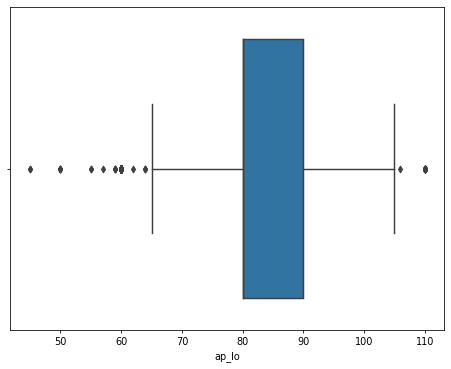

In [56]:
sns.boxplot(df.ap_lo);

**Ortalama 81 olabilir mi onu inceleyelim**

In [142]:
stats.ttest_1samp(df.ap_lo, 81, alternative="greater")

Ttest_1sampResult(statistic=-0.6131570484567275, pvalue=0.7301067759711496)

**%95 güvenirlikte incelediğimizde pvalue > alpha oldugundan H0 hipotezini kabul ederiz. Yani ortalama 81 olabilir**

In [58]:
sem = df.ap_hi.sem()
stats.t.interval(0.90, len(df.ap_lo) - 1, df.ap_lo.mean(), sem)

(80.70533024858604, 81.18686975141397)

**Ortalama uzunluk %90 güvenirlikte 80.7 ile 81.1 arasındadır**

# 🩸 ap_lo ❌ Gender👩👨

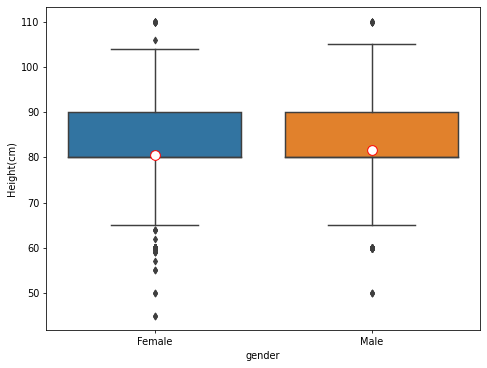

In [59]:
ax = sns.boxplot(y = df.ap_lo,x =  df.gender, showmeans = True, meanprops = {"marker" : "o",
                                                      "markerfacecolor" : "white",
                                                      "markeredgecolor" : "red",
                                                      "markersize" : 10})
ax.set_xticklabels(["Female", "Male"])
ax.set_ylabel("Height(cm)");

In [60]:
df.groupby("gender").ap_lo.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,6507.0,80.612725,8.924195,45.0,80.0,80.0,90.0,110.0
2,3493.0,81.567134,8.502535,50.0,80.0,80.0,90.0,110.0


In [61]:
stats.levene(df[df.gender == 1].ap_hi, df[df.gender == 2].ap_hi)

LeveneResult(statistic=1.4555558509549695, pvalue=0.2276671034543365)

**pvalue > 0.05 oldugu için varyanslar aynıdır diyebiliriz**

In [62]:
stats.ttest_ind(df[df.gender == 1].ap_hi, df[df.gender == 2].ap_hi, equal_var=True)

Ttest_indResult(statistic=-5.807074283356783, pvalue=6.551233420774094e-09)

**pvalue < 0.05 oldugu için  H0 hipotezi reddedilir küçük tansiyonları farklıdır**

# 🩸 ap_lo ❌ cholesterol😷

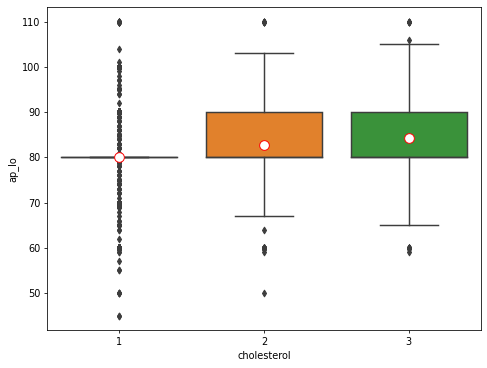

In [63]:
ax = sns.boxplot(y = df.ap_lo,x =  df.cholesterol, showmeans = True, meanprops = {"marker" : "o",
                                                      "markerfacecolor" : "white",
                                                      "markeredgecolor" : "red",
                                                      "markersize" : 10})

In [64]:
df.groupby("cholesterol").ap_lo.describe()

,count,mean,std,min,25%,50%,75%,max
cholesterol,,,,,,,,
1,7506.0,80.116041,8.525526,45.0,80.0,80.0,80.0,110.0
2,1329.0,82.796840,9.613351,50.0,80.0,80.0,90.0,110.0
3,1165.0,84.182833,8.419217,59.0,80.0,80.0,90.0,110.0


**Kolestrol seviyelerine göre düşük tansiyon ortalamarında anlamlı bir fark mı inceleyelim**

In [65]:
stats.f_oneway(df[df["cholesterol"]==1]["ap_lo"],
               df[df["cholesterol"]==2]["ap_lo"],
               df[df["cholesterol"]==3]["ap_lo"])

F_onewayResult(statistic=146.00513693120493, pvalue=3.1565452211097865e-63)

**pvalue < 0.05 oldugu  için H0 hipotezini reddediriz. En az biri farklıdır. Peki hangisi ?**

In [66]:
multicomp = MultiComparison(df.ap_lo, df.cholesterol)

In [67]:
tukey = multicomp.tukeyhsd(alpha = 0.05)

In [68]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   2.6808    0.0 2.0763 3.2853   True
     1      3   4.0668    0.0 3.4271 4.7064   True
     2      3    1.386 0.0002 0.5707 2.2013   True
--------------------------------------------------


**Tüm seviyedeki kolestrol ortalamarı istatiksel olarak birbirleri ile farklıdır**

# 🩸 ap_lo ❌ gluc🍨

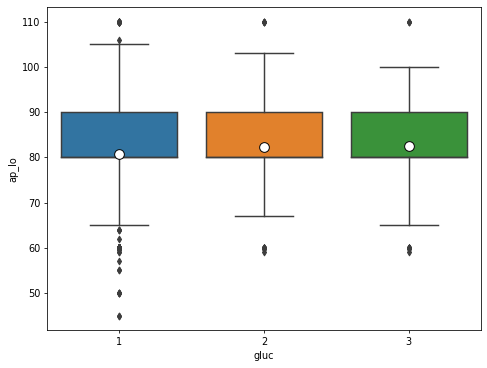

In [69]:
sns.boxplot(x = df.gluc, y = df.ap_lo, showmeans = True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"});

In [70]:
df.groupby("gluc").ap_lo.describe()

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,8474.0,80.688813,8.716189,45.0,80.0,80.0,90.0,110.0
2,741.0,82.306343,9.387849,59.0,80.0,80.0,90.0,110.0
3,785.0,82.439490,8.752068,59.0,80.0,80.0,90.0,110.0


**Ortalamalar istatiksel olarak bir fark var mı ınceleyelım**

In [71]:
stats.f_oneway(df[df["gluc"]==1]["ap_lo"],
               df[df["gluc"]==2]["ap_lo"],
               df[df["gluc"]==3]["ap_lo"])

F_onewayResult(statistic=23.93821509747193, pvalue=4.251872953777657e-11)

**pvalue < 0.05 oldugu çıktığı için H0 hipotezini reddediriz.En az biri farklıdır. Peki hangisi ?**

In [143]:
multicomp = MultiComparison(df.ap_lo, df.gluc)

In [144]:
tukey = multicomp.tukeyhsd(alpha = 0.05)

In [145]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   1.6175    0.0    0.83 2.4051   True
     1      3   1.7507    0.0  0.9837 2.5177   True
     2      3   0.1331 0.9527 -0.9198 1.1861  False
---------------------------------------------------


**2 ve 3.seviyedeki ortalamalar birbiri ile aynıdır**

# 🩸 ap_lo ❌ smoke🚬

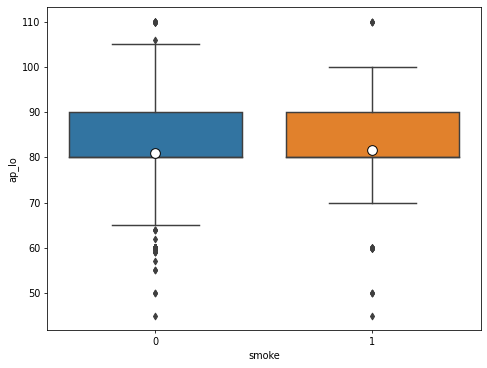

In [72]:
sns.boxplot(x = df.smoke, y = df.ap_lo, showmeans = True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"});

In [73]:
df.groupby("smoke").ap_lo.describe()

,count,mean,std,min,25%,50%,75%,max
smoke,,,,,,,,
0,9110.0,80.890121,8.728250,45.0,80.0,80.0,90.0,110.0
1,890.0,81.519101,9.390789,45.0,80.0,80.0,90.0,110.0


**Sigara içen ve içmeyenler'in küçük tansiyonların ortalamaları arasında anlamı bir fark var mı yok mu ınceleyelım**

In [74]:
stats.levene(df[df.smoke == 0].ap_lo, df[df.smoke == 1].ap_lo)

LeveneResult(statistic=8.808126353629875, pvalue=0.0030060239979320122)

**pvalue < 0.05 oldugu için varyanslar farklıdır diyebiliriz**

In [146]:
stats.ttest_ind(df[df["smoke"]==0]["ap_lo"],df[df["smoke"]==1]["ap_lo"], equal_var=False)

Ttest_indResult(statistic=-1.918828023281786, pvalue=0.05527835410653456)

**pvalue > 0.05 cıktıgı için H0 hipotezini kabul ederiz. Yani Ortalamalar birbiri ile aynıdır**

# 🩸 ap_lo ❌ alco🍾

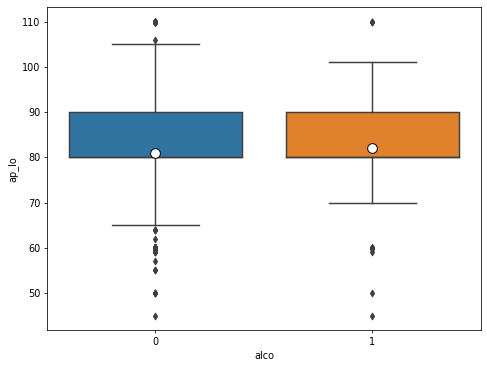

In [76]:
sns.boxplot(x = df.alco, y = df.ap_lo, showmeans = True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"});

In [77]:
df.groupby("alco").ap_lo.describe()

,count,mean,std,min,25%,50%,75%,max
alco,,,,,,,,
0,9454.0,80.880262,8.751494,45.0,80.0,80.0,90.0,110.0
1,546.0,82.086081,9.377012,45.0,80.0,80.0,90.0,110.0


**Alkol içen ve içmeyenler'in küçük tansiyonların ortalamaları arasında anlamı bir fark var mı yok mu ınceleyelım**

In [78]:
stats.levene(df[df.alco == 0].ap_lo, df[df.alco == 1].ap_lo)

LeveneResult(statistic=8.796895314266424, pvalue=0.0030245689409194336)

**pvalue < 0.05 oldugu için varyanslar farklıdır diyebiliriz**

In [79]:
stats.ttest_ind(df[df["alco"]==0]["ap_lo"],df[df["alco"]==1]["ap_lo"], equal_var=False)

Ttest_indResult(statistic=-2.931945904602916, pvalue=0.003496597948786992)

**pvalue < 0.05  için H0 hipotezi reddedilir alkol içen ve içmeyen kişilerin küçük tansiyonları birbirinden farklıdır**

# 🩸 ap_lo ❌ active🚴

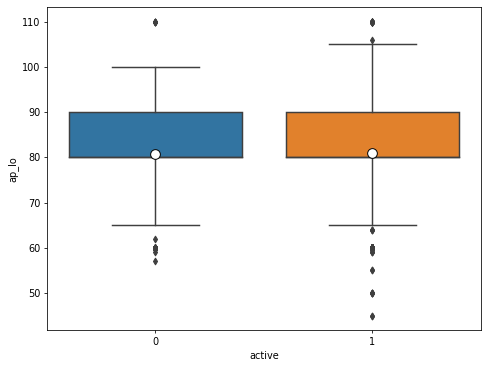

In [80]:
sns.boxplot(x = df.active, y = df.ap_lo, showmeans = True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"});

In [81]:
df.groupby("active").ap_lo.describe()

,count,mean,std,min,25%,50%,75%,max
active,,,,,,,,
0,1900.0,80.783684,8.664664,57.0,80.0,80.0,90.0,110.0
1,8100.0,80.984198,8.819939,45.0,80.0,80.0,90.0,110.0


**Aktif olanların ve olmayanların küçük tansiyonların ortalamaları arasında anlamı bir fark var mı yok mu ınceleyelım**

In [82]:
stats.levene(df[df.active == 0].ap_lo, df[df.active == 1].ap_lo)

LeveneResult(statistic=1.517491455706584, pvalue=0.21802847707389467)

**pvalue > 0.05 oldugu için varyanslar aynıdır diyebiliriz**

In [147]:
stats.ttest_ind(df[df["active"]==0]["ap_lo"],df[df["active"]==1]["ap_lo"], equal_var=True)

Ttest_indResult(statistic=-0.8948313080119109, pvalue=0.3708988126615268)

**pvalue > 0.05 oldugu için H0 hipotezini kabul ederiz. Yani Aktif olanlar ile olmayanlar arasındaki küçük tansiyon ortalamarı arasında anlamlı bir fark yoktur**

# 🩸 ap_lo ❌ cardio❤️

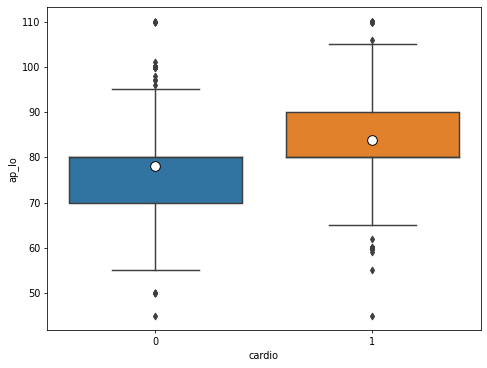

In [84]:
sns.boxplot(x = df.cardio, y = df.ap_lo, showmeans = True, meanprops={"marker":"o",
                                                                    "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black",
                                                                    "markersize":"10"});

In [85]:
df.groupby("cardio").ap_lo.describe()

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,5124.0,78.120999,7.972442,45.0,70.0,80.0,80.0,110.0
1,4876.0,83.914889,8.631198,45.0,80.0,80.0,90.0,110.0


In [86]:
stats.levene(df[df.cardio == 0].ap_lo, df[df.cardio == 1].ap_lo)

LeveneResult(statistic=127.85569245795956, pvalue=1.821830870135843e-29)

**pvalue 0'a çok yakın bir değer oldugu için varyanslar farklıdır diyebiliriz**

In [87]:
stats.ttest_ind(df[df["cardio"]==0]["ap_lo"],df[df["cardio"]==1]["ap_lo"], equal_var=False)

Ttest_indResult(statistic=-34.822951392681084, pvalue=1.1890551288249128e-250)

**pvalue 0'a çok yakın bir değer oldugu için ortalamalar farklıdır dıyebılırız**

# 😷 cholesterol❌ gluc🍨

**aralarında anlamı bir ilişki var mı onu inceleyelim**

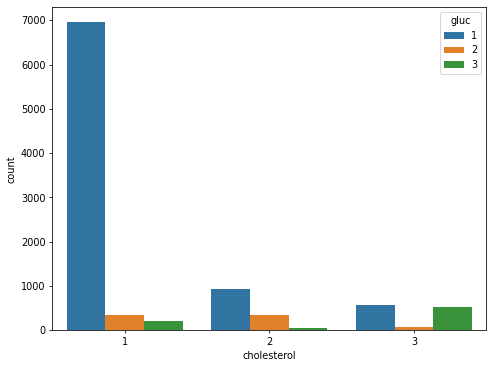

In [88]:
sns.countplot(x = df.cholesterol, hue = df.gluc);

In [89]:
ct = pd.crosstab(df.cholesterol, df.gluc)
ct

gluc,1,2,3
cholesterol,,,
1,6956,337,213
2,944,336,49
3,574,68,523


In [90]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [91]:
print("test statictis", chi)
print("p-value", p)

test statictis 3227.278585680451
p-value 0.0


**cholesterol ile gluc değişkenleri arasında anlamı bir bağlantı vardır**

 # 😷 cholesterol❌ smoke 🚬

**aralarında anlamı bir ilişki var mı onu inceleyelim**

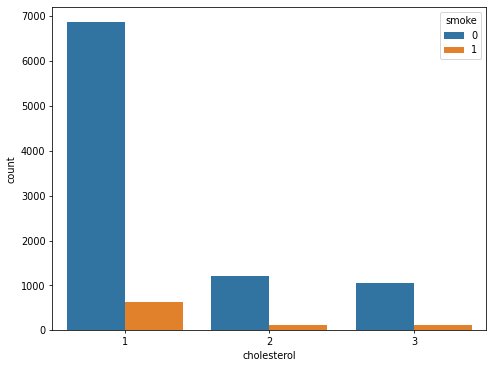

In [92]:
sns.countplot(x = df.cholesterol, hue = df.smoke);

In [93]:
ct = pd.crosstab(df.cholesterol, df.smoke)
ct

smoke,0,1
cholesterol,,
1,6866,640
2,1200,129
3,1044,121


In [94]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [95]:
print("test statictis", chi)
print("p-value", p)

test statictis 5.531694529642023
p-value 0.0629227645120287


**pvalue > 0.05 cholesterol ile smoke değişkenleri arasında anlamı bir bağlantı yoktur**

 # 😷 cholesterol❌ alco 🍺

**aralarında anlamı bir ilişki var mı onu inceleyelim**

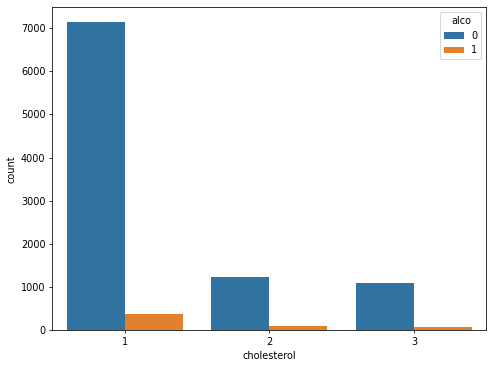

In [96]:
sns.countplot(x = df.cholesterol, hue = df.alco);

In [97]:
ct = pd.crosstab(df.cholesterol, df.alco)
ct

alco,0,1
cholesterol,,
1,7131,375
2,1229,100
3,1094,71


In [98]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [99]:
print("test statictis", chi)
print("p-value", p)

test statictis 15.012059435421827
p-value 0.0005497594617288868


**cholesterol ile alco değişkenleri arasında anlamı bir bağlantı vardır**

 # 😷 cholesterol❌ active 🚴‍♀️

**aralarında anlamı bir ilişki var mı onu inceleyelim**

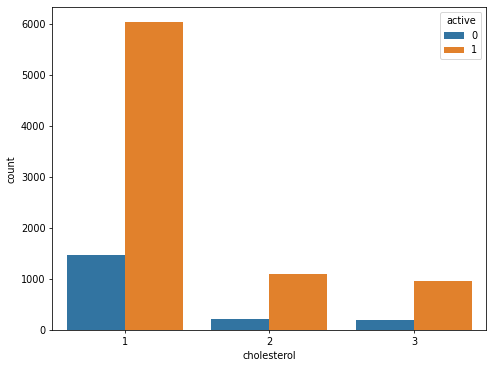

In [100]:
sns.countplot(x = df.cholesterol, hue = df.active);

In [101]:
ct = pd.crosstab(df.cholesterol, df.active)
ct

active,0,1
cholesterol,,
1,1473,6033
2,227,1102
3,200,965


In [102]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [103]:
print("test statictis", chi)
print("p-value", p)

test statictis 7.624903609468254
p-value 0.022093942462834307


**pvalue < 0.05 oldugu için cholestrol seviyesi ile aktiflik seviyesi arasında bir bağ vardır**

 # 😷 cholesterol❌ cardio ❤️

**aralarında anlamı bir ilişki var mı onu inceleyelim**

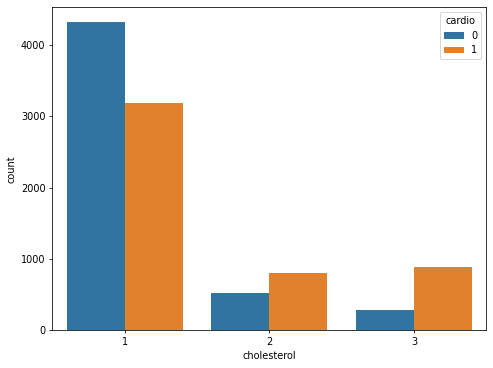

In [104]:
sns.countplot(x = df.cholesterol, hue = df.cardio);

In [105]:
ct = pd.crosstab(df.cholesterol, df.cardio)
ct

cardio,0,1
cholesterol,,
1,4318,3188
2,523,806
3,283,882


In [106]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [107]:
print("test statictis", chi)
print("p-value", p)

test statictis 532.5406678023987
p-value 2.2922569183924152e-116


**pvalue 0'a cok yakın bir değer oldugu için aralarında güçlü bir bağ vardır**

 # 🍨 gluc❌ smoke 🚬

**aralarında anlamı bir ilişki var mı onu inceleyelim**

In [108]:
ct = pd.crosstab(df.gluc, df.smoke)
ct

smoke,0,1
gluc,,
1,7720,754
2,665,76
3,725,60


In [109]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [110]:
print("test statictis", chi)
print("p-value", p)

test statictis 3.2105617807805835
p-value 0.20083313488903967


**pvalue > 0.05 oldugu için sigara içme durumu ile şeker hastası olma durumu arasında bir ilişki yoktur**

 # 🍨 gluc❌ alco 🍺

In [111]:
ct = pd.crosstab(df.gluc, df.alco)
ct

alco,0,1
gluc,,
1,8024,450
2,689,52
3,741,44


In [112]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [113]:
print("test statictis", chi)
print("p-value", p)

test statictis 3.882106140550589
p-value 0.14355269907253804


**pvalue > 0.05 oldugu için sigara içme durumu ile alkol kullanma durumu arasında bir ilişki yoktur**

 # 🍨 gluc❌ active 🚴‍♀️

In [114]:
ct = pd.crosstab(df.gluc, df.active)
ct

active,0,1
gluc,,
1,1620,6854
2,133,608
3,147,638


In [115]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [116]:
print("test statictis", chi)
print("p-value", p)

test statictis 0.6461535053977847
p-value 0.723918289553067


**pvalue > 0.05 oldugu için şeker hastası olma durumu ile aktiflik durumu arasında hiçbir bağ yoktur**

 # 🍨 gluc❌ cardio ❤️

In [117]:
ct = pd.crosstab(df.gluc, df.cardio)
ct

cardio,0,1
gluc,,
1,4510,3964
2,312,429
3,302,483


In [118]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [119]:
print("test statictis", chi)
print("p-value", p)

test statictis 89.29204059441366
p-value 4.0783054149841764e-20


**pvalue < 0.05 oldugu için seker hastası olma durumu ile cardiovaskuler hastası olma durumu ıle bir bağı vardır**

 # 🚬 smoke ❌ alco 🍺

In [120]:
ct = pd.crosstab(df.smoke, df.alco)
ct

alco,0,1
smoke,,
0,8840,270
1,614,276


In [121]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [122]:
print("test statictis", chi)
print("p-value", p)

test statictis 1230.1989035018246
p-value 1.668408382776046e-269


**pvalue  oldugu için sıgara kullanma ıle alkol kullanma durumu arasında bir bağ vardır**

 # 🚬 smoke ❌ active 🚴‍♀️

In [123]:
ct = pd.crosstab(df.smoke, df.active)
ct

active,0,1
smoke,,
0,1753,7357
1,147,743


In [124]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [125]:
print("test statictis", chi)
print("p-value", p)

test statictis 3.7390433372000405
p-value 0.05315487044200762


**pvalue > 0.05 oldugu için sigara kullanma durumu ile alkol kullanma durumu arasında bir ilişki yoktur**

 # 🚬 smoke ❌ cardio ❤️

In [126]:
ct = pd.crosstab(df.smoke, df.active)
ct

active,0,1
smoke,,
0,1753,7357
1,147,743


In [127]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [128]:
print("test statictis", chi)
print("p-value", p)

test statictis 3.7390433372000405
p-value 0.05315487044200762


**pvalue > 0.05 oldugu için sigara kullanma durumu ile cardiovaskuler hastası olma durumu arasında bir ilişki yoktur**

 # 🍺 alco ❌ active 🚴‍♀️

In [129]:
ct = pd.crosstab(df.alco, df.active)
ct

active,0,1
alco,,
0,1823,7631
1,77,469


In [130]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [131]:
print("test statictis", chi)
print("p-value", p)

test statictis 8.667239567987664
p-value 0.0032398158588412074


**pvalue < 0.05 oldugu için alkol kullanma durumu ile aktiflik durumu arasında bir ilişki vardır**

 # 🍺 alco ❌ cardio ❤️

In [132]:
ct = pd.crosstab(df.alco, df.cardio)
ct

cardio,0,1
alco,,
0,4842,4612
1,282,264


In [133]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [134]:
print("test statictis", chi)
print("p-value", p)

test statictis 0.02319585015400425
p-value 0.8789488745524152


**pvalue > 0.05 oldugu için alkol kullanma durumu ile kardiovaskuler hastası olma durumu arasında bir ilişki yoktur**

 # 🚴‍♀️ active ❌ cardio ❤️

In [135]:
ct = pd.crosstab(df.active, df.cardio)
ct

cardio,0,1
active,,
0,923,977
1,4201,3899


In [136]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [137]:
print("test statictis", chi)
print("p-value", p)

test statictis 6.517338118243129
p-value 0.010682777795862054


**pvalue < 0.05 oldugu için aktiflik durumu ile kardiovaskuler hastası olma durumu arasında bir ilişki vardır**